# Computing NDVI anomalies

In this exercise we download 1 km NDVI data for one or several points and compute NDVI anomalies.

The NDVI data is sourced from the Copernicus Global Land NDVI collection, available on the [Copernicus Data Space Ecosystem](https://dataspace.copernicus.eu/):

- [1999 - 2020 1 km NDVI CGLS collection](https://land.copernicus.eu/en/products/vegetation/normalised-difference-vegetation-index-v3-0-1km)
- [2020 - present 300 m NDVI CGLS collection](https://land.copernicus.eu/en/products/vegetation/normalised-difference-vegetation-index-v2-0-300m)

Product download is accomplished through the [OpenEO](https://openeo.org) processing framework.

Before we start, we need to install some required python packages:

In [ ]:
!pip install ipykernel ipyleaflet geopandas matplotlib geojson scipy rasterio --quiet

In [ ]:
# Use the interactive widget to draw a point on the map.
# Once you drew a point, enter a name for the point in the text box below the map.
# Then click the "submit" button to save the point to the database.

from vito_agri_tutorials.utils.map import ui_map

map = ui_map(geometry_type='point')

In [ ]:
# We retrieve the points from the map and store it in a .gpkg file
# Feel free to change the filename (out_filename) to your liking.

# Set output directory
from pathlib import Path
result_dir = Path('./results')
result_dir.mkdir(parents=True, exist_ok=True)

# Retrieve points from the map
points = map.get_objects()

# Save points to a file
out_filename = '1_ndvi_points.gpkg'
outfile = result_dir / out_filename
points.to_file(outfile, driver='GPKG')

Authenticated using refresh token.
Temporal extent 1km: ['2017-01-01', '2020-06-30']
Temporal extent 300m: ['2020-07-01', '2024-12-31']
0:00:00 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': send 'start'
0:00:16 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': created (progress 0%)
0:00:21 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': queued (progress 0%)
0:00:28 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': queued (progress 0%)
0:00:36 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': queued (progress 0%)
0:00:47 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': queued (progress 0%)
0:00:59 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': queued (progress 0%)
0:01:15 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': queued (progress 0%)
0:01:34 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': running (progress 11.6%)
0:01:58 Job 'terrascope-j-250316104250438caa9aa3c23b618e65': running (progress 14.7%)
0:02:28 Job 'terrascope-j-250316104250438ca

<Axes: >

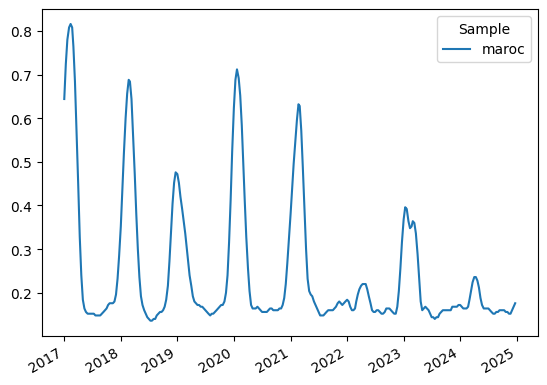

In [2]:
# Now we start extractions of NDVI data for our point(s). We will extract 2017 - 2024.
# Again, feel free to change the name of the output directory (ndvi_dir_name) to your liking.

from vito_agri_tutorials.openeo.extract_data import get_ndvi_1km_point

start_date = '2017-01-01'
end_date = '2024-12-31'

ndvi_dir_name = 'ndvi_morocco'
ndvi_dir = result_dir / ndvi_dir_name

df = get_ndvi_1km_point(points, start_date, end_date, ndvi_dir)
df.plot()
print(df)

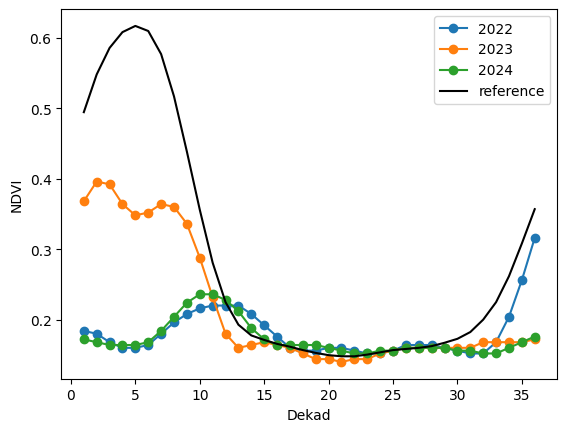

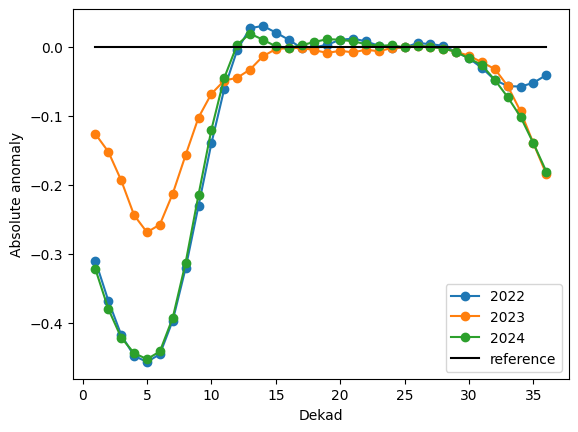

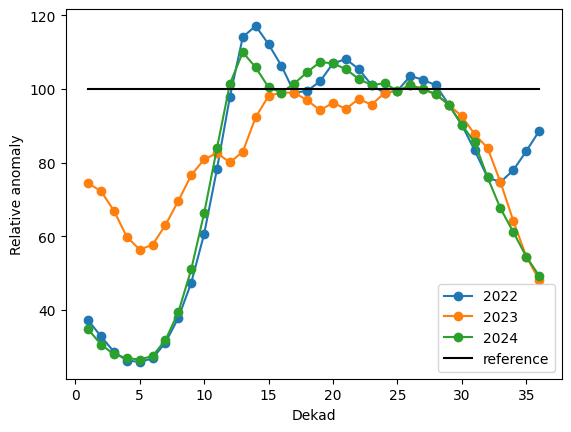

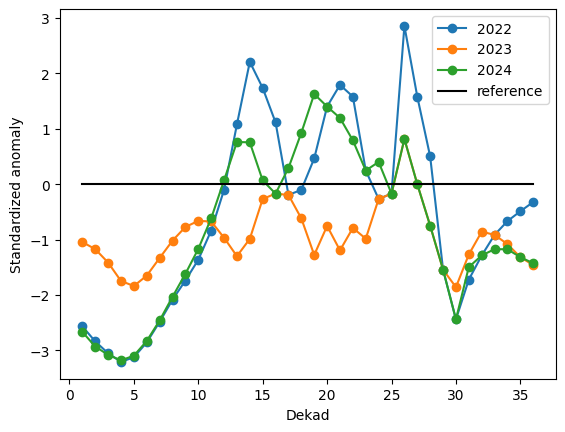

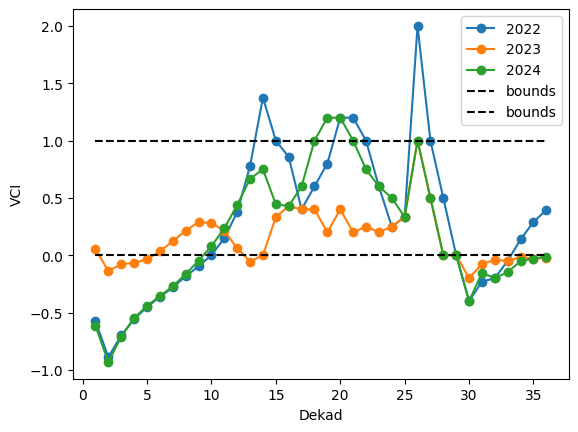

In [4]:
# Here we show how to compute anomalies for one of the extracted points.T
# Make sure to change the value of "point_id" to the id of the point you want to compute anomalies for.

from vito_agri_tutorials.utils.anomalies import compute_anomalies

nyears = 8
ref_period = 5
label_years = ["2022", "2023", "2024"]

point_id = "maroc"

ndvi = df[point_id].values

diff, rel_an, std_an, vci = compute_anomalies(
    ndvi,
    nyears,
    ref_period,
    label_years)